## Singapore Housing Prediction based on Resales
<hr>
Prediction of housing prices has been a popular topic in data science. In this project, the housing prices are being predicted based on the historical resale data from the Singaporean government. <br>

 After merging the data, we explore the data, then clean and preprocess the data and finally train the data to predict the test data. 

## Libraries
<hr>
The libraries used are pandas, numpy, seaborn, Counter, matplotlib, axes3d, linearregression.

In [1]:
#data analysis
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn import datasets

#visualization
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# machine learning library
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


## 1 Data Acquisition
<hr>
The data for this report is acquired from the Singapore government website. Data are collected from the period 1990 until now. The data online are divided into four seperate files, which we will merge in Python. Since the third file contains more than 20 mb of data, this file has been seperated into 2006 to 2012 and 2012 to 2014. This makes uploading the data on github possible.

In [2]:
#load dataset
data1 = pd.read_csv('sg-resale-flat-prices-1990-1999.csv', sep =',')
print('Number of training data =', data1.shape)

data2 = pd.read_csv('sg-resale-flat-prices-2000-2005.csv', sep =',')
print('Number of training data =', data2.shape)

data3 = pd.read_csv('sg-resale-flat-prices-2006-2012.csv', sep =',')
print('Number of training data =', data3.shape)

data4 = pd.read_csv('sg-resale-flat-prices-2012-2014.csv', sep =',')
print('Number of training data =', data4.shape)

data5 = pd.read_csv('sg-resale-flat-prices-2014-2018.csv', sep =',')
print('Number of training data =', data5.shape)

Number of training data = (288144, 10)
Number of training data = (197175, 10)
Number of training data = (172476, 10)
Number of training data = (52203, 10)
Number of training data = (58631, 11)


Following the shape of the data, the last data set contains 11 features instead of 10 if we compare with the other data sets. To check which feature is added to the last data set, we recall the variables of the first data sets and the variables of the last data set. 

In [3]:
#show features of data set 1
data1.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [4]:
#show features of data set 5
data5.tail(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
58626,2018-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,68,490000.0
58627,2018-01,YISHUN,5 ROOM,876,YISHUN ST 81,04 TO 06,121.0,Improved,1987,69,468000.0
58628,2018-01,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,146.0,Maisonette,1987,68,555000.0
58629,2018-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,69,550000.0
58630,2018-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,66,545000.0


By comparing the two data sets, we can see that the extra feature is the remaining lease year of the HBD housing. In Singapore, the lease of the HBD housing starts with 99 years. In the 99 years, the appartment can be resold to someone else, but this does not mean that 99 years will be refreshed. The number of years the previous owner has lived in the appartment will be substracted instead. After the remaining lease year, the current owner will have to move [source]. We believe this is an important feature to consider in the predictive model. Therefore, we will recalculate the row for the other data sets as well during the preprocessing stage. <br>

However, before the preprocessing stage, exploration will be done to figure out other possible changes. To continue with the exploration, the data should be merged. To merge the data, the datasets should consist of the same number of features. Therefore, the remaining lease variable will be removed first.

In [5]:
data5 = data5.drop('remaining_lease',1)
print('Number of training data =', data5.shape)

Number of training data = (58631, 10)


In [6]:
data5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0


(Exploration - Check Storey Range) Since the storey range is ranging differently at a certain point. We are checking in which dataset(s) this is happening.

In [7]:
print(np.unique(data1['storey_range']))
print(np.unique(data2['storey_range']))
print(np.unique(data3['storey_range']))
print(np.unique(data4['storey_range']))
print(np.unique(data5['storey_range']))

['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42']
['01 TO 03' '01 TO 05' '04 TO 06' '06 TO 10' '07 TO 09' '10 TO 12'
 '11 TO 15' '13 TO 15' '16 TO 18' '16 TO 20' '19 TO 21' '21 TO 25'
 '22 TO 24' '25 TO 27' '26 TO 30' '28 TO 30' '31 TO 33' '31 TO 35'
 '34 TO 36' '36 TO 40' '37 TO 39' '40 TO 42']
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42' '43 TO 45' '46 TO 48' '49 TO 51']


### 1.1 Merge Datasets
Since the data are divided into five datasets, we want to merge the data for further exploration. To do this, the concatenation is used from pandas.

In [8]:
#concatenate dataset
sets = [data1, data2, data3, data4, data5]
data = pd.concat(sets)
print('Number of training data =', data.shape)


Number of training data = (768629, 10)


## 2 Exploration of the Dataset
<hr>
To start exploring the data, the dataset are loaded. From the dataset, we can conclude the data contain 709.998 datapoints and 10 features. <br>

### 2.1 Data description

In [9]:
#load dataset
print('Number of training data =', data.shape[0])
print('Number of features =', data.shape[1])

Number of training data = 768629
Number of features = 10


We use data.describe() to have a look at some key metrics of the data set.

In [10]:
print(data.describe())

       floor_area_sqm  lease_commence_date  resale_price
count   768629.000000        768629.000000  7.686290e+05
mean        95.455564          1986.563476  2.823196e+05
std         26.210450             8.851260  1.424499e+05
min         28.000000          1966.000000  5.000000e+03
25%         72.000000          1980.000000  1.750000e+05
50%         93.000000          1985.000000  2.650000e+05
75%        114.000000          1993.000000  3.700000e+05
max        307.000000          2015.000000  1.180000e+06


We can conclude:
- All appartments vary between the size of 26.4 and 307 sqm. The median is 95.3 sqm.
- The oldest lease start date is 1996 and the oldest one is 2012. Thus no appartment in this list has a lease that expires before 2066. The mean lease start date is 1986. 
- Resale prices vary between 5000 SGD and 1.09 million SGD. It has to be verified if a price of 5000SGD is possible or is due to faulty data. The median price lies at 260k SGD.
- Overall, at a first glance the dataset seems to be clean and free of faulty datapoints. <br>

Let's have a look at the data types:

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768629 entries, 0 to 58630
Data columns (total 10 columns):
month                  768629 non-null object
town                   768629 non-null object
flat_type              768629 non-null object
block                  768629 non-null object
street_name            768629 non-null object
storey_range           768629 non-null object
floor_area_sqm         768629 non-null float64
flat_model             768629 non-null object
lease_commence_date    768629 non-null int64
resale_price           768629 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 64.5+ MB
None


In [12]:
data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

We can see that the data list is complete, as all features have 709,998 values. <br>

After loading the data, the data are explored. Features are checked to see whether cleaning and preprocessing of the data is needed. <br>

### 2.2 Univariate Plots

#### Sales Trend

Total Sales Year Count: 29


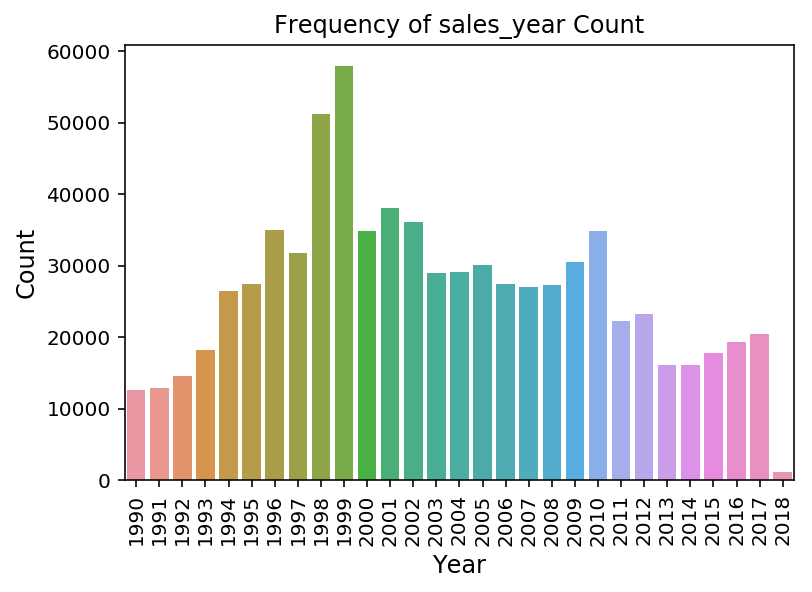

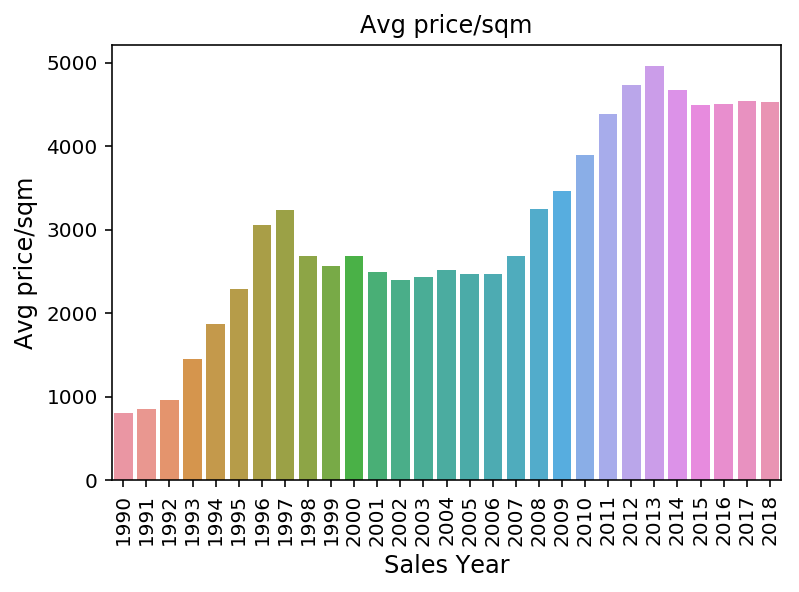

In [13]:
#yearly sales trend
count_sales_year = (pd.DatetimeIndex(data['month']).year).nunique()
print("Total Sales Year Count:", count_sales_year)
#sales_year_count = (pd.DatetimeIndex(data['month']).year).value_counts()
#print("Sales Year Count \n" +str(sales_year_count))

sales_year = np.unique(pd.DatetimeIndex(data['month']).year.values)
year_count=pd.DatetimeIndex(data['month']).year.value_counts()

sns.barplot(year_count.index, year_count.values, order=sales_year)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_year Count", fontsize=12)
plt.show()

#sales year vs avg price/sqm
n = len(sales_year)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][pd.DatetimeIndex(data['month']).year == sales_year[i]].sum()
        sqmm = data['floor_area_sqm'][pd.DatetimeIndex(data['month']).year == sales_year[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(sales_year,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Sales Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- Counts of Sales per year increase from 1990 to 1999 and decrease thereafter.
- As expected, in general, prices per sqm increase over time.
- However there was a dip after 1997 and after 2013.

Total Sales Month Count: 12


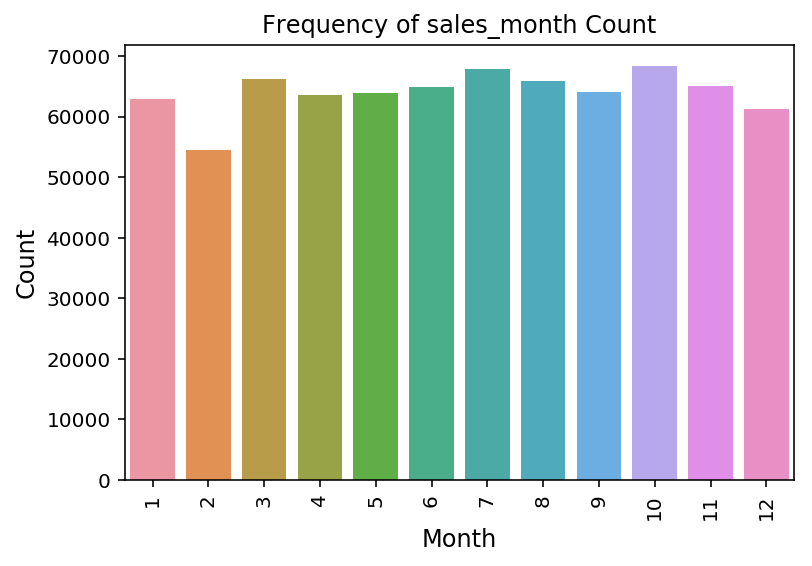

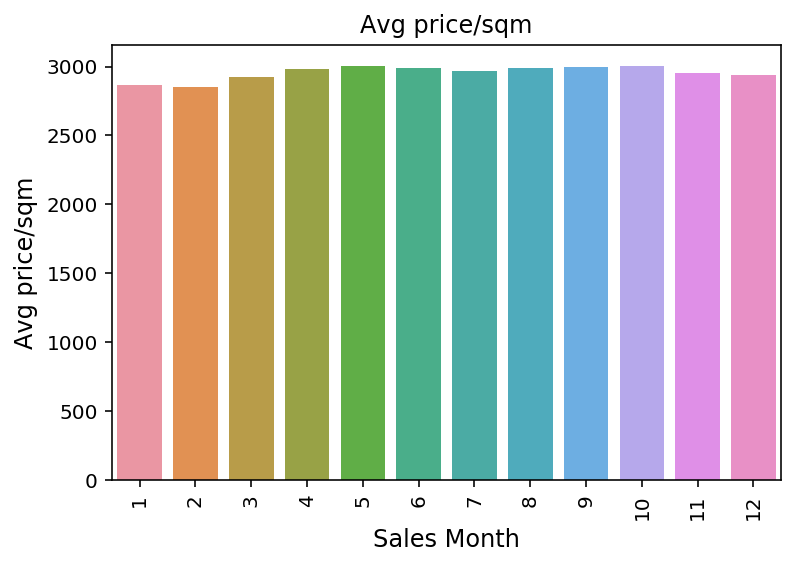

In [14]:
#monthly sales trend
count_sales_month = (pd.DatetimeIndex(data['month']).month).nunique()
print("Total Sales Month Count:", count_sales_month)
#sales_month_count = (pd.DatetimeIndex(data['month']).month).value_counts()
#print("Sales Month Count \n" +str(sales_month_count))

sales_month = np.unique(pd.DatetimeIndex(data['month']).month.values)
month_count=pd.DatetimeIndex(data['month']).month.value_counts()

sns.barplot(month_count.index, month_count.values, order=sales_month)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_month Count", fontsize=12)
plt.show()

#sales month vs avg price/sqm
n = len(sales_month)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][pd.DatetimeIndex(data['month']).month == sales_month[i]].sum()
        sqmm = data['floor_area_sqm'][pd.DatetimeIndex(data['month']).month == sales_month[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(sales_month,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Sales Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- It seems like the last and first month of a year have slightly lower prices than the middle months. <br>

#### Feature: Lease Commencement Year

Total Lease Commence Count: 50


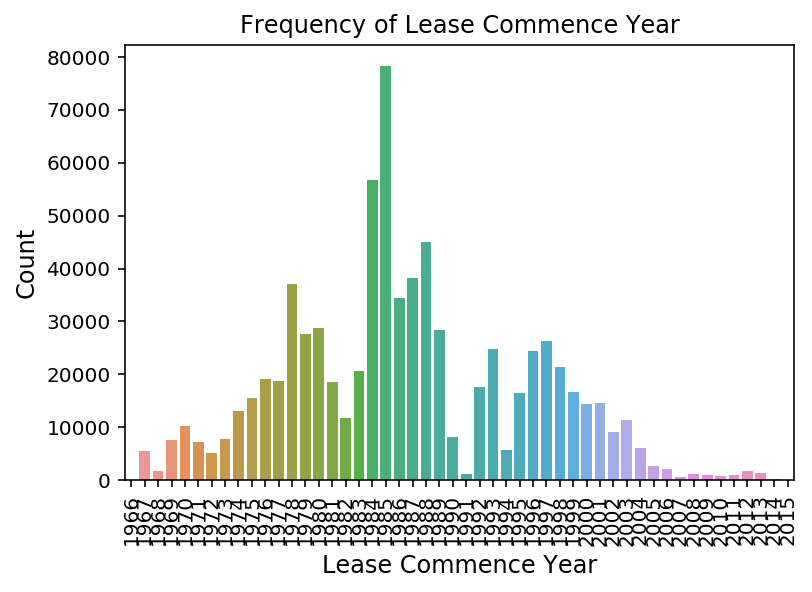

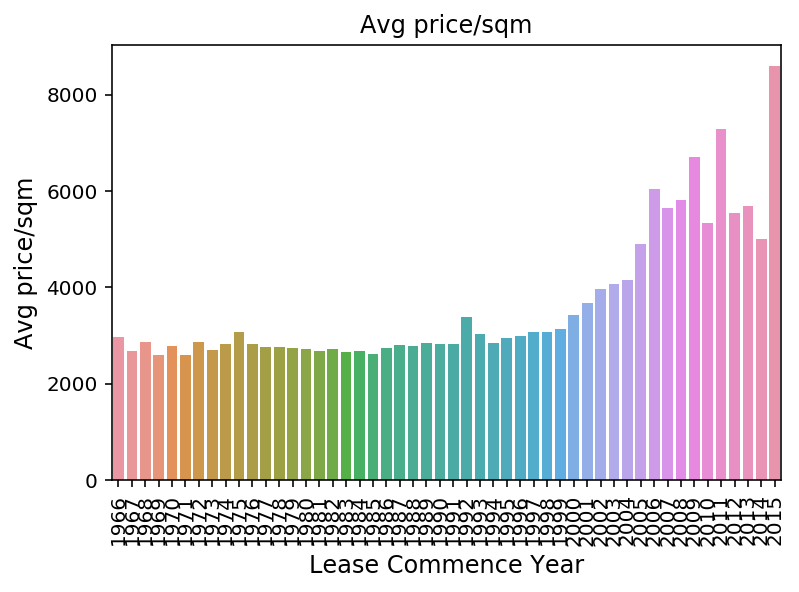

In [15]:
#lease commencement year
count_lease_commence = data['lease_commence_date'].nunique()
print("Total Lease Commence Count:", count_lease_commence)
#lease_commence_count = data['lease_commence_date'].value_counts()
#print("Lease Commence Count \n" +str(lease_commence_count))

lease_commence = np.unique(data['lease_commence_date'])

sns.countplot(x="lease_commence_date", data=data , order = lease_commence)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Lease Commence Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Lease Commence Year", fontsize=12)
plt.show()

#town vs avg price/sqm
n = len(lease_commence)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['lease_commence_date'] == lease_commence[i]].sum()
        sqmm = data['floor_area_sqm'][data['lease_commence_date'] == lease_commence[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(lease_commence,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Lease Commence Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- The years 1984-1990 have the most commencement dates. Before, there is an ongoing increase and after an ongoing decrease.
- Prices/sqm remain relatively flat for commencement dates from 1966 to 2000 and increase from 2000 to 2012. After 2012 the prices decrease heavily and in 2015, it almost doubled again. <br>

#### Feature: Town

Total Town Count: 27


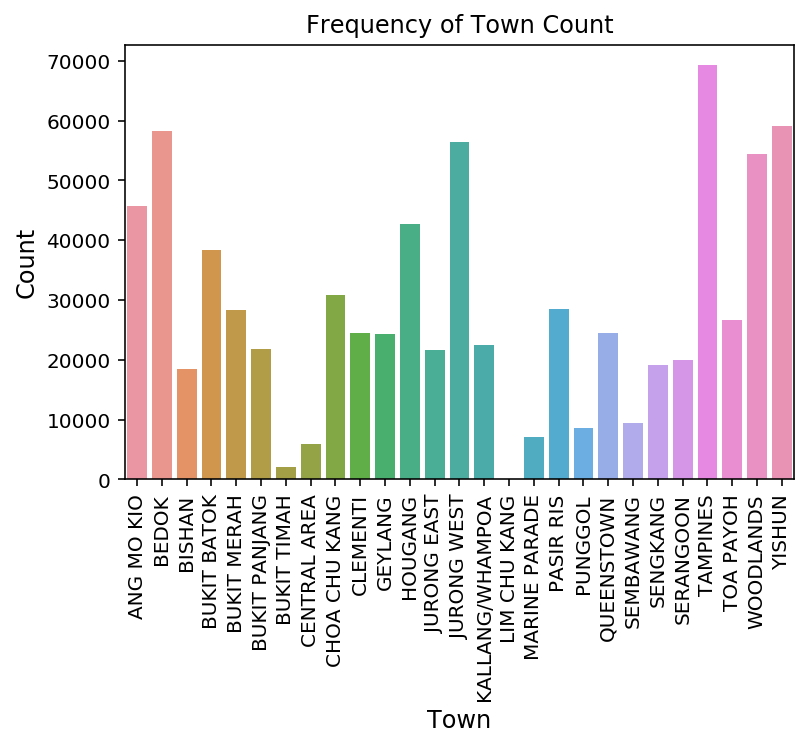

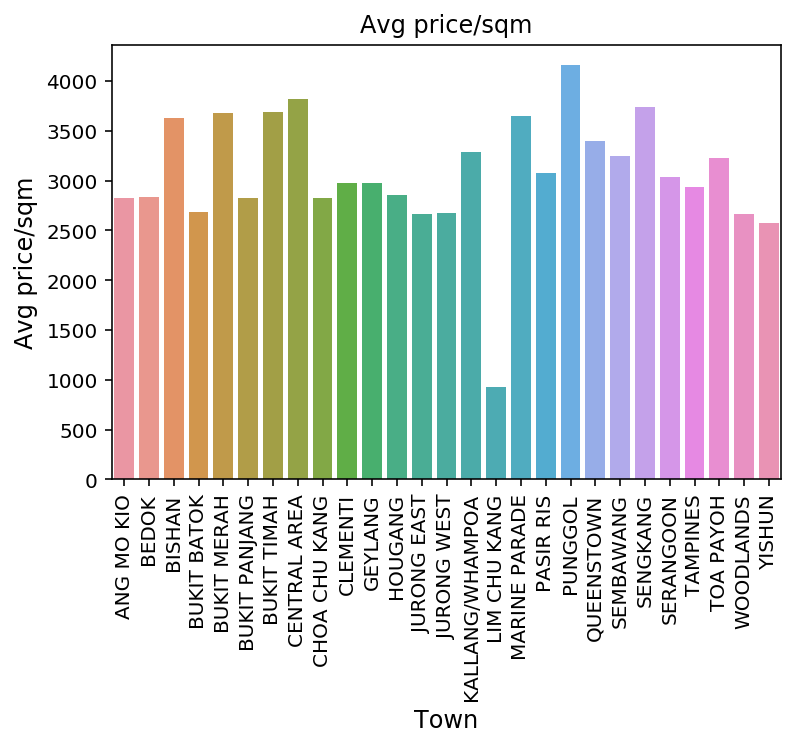

In [16]:
#town count
count_towns = data['town'].nunique()
print("Total Town Count:", count_towns)
#towns_count = data['town'].value_counts()
#print("Town Count \n" +str(towns_count))

town = np.unique(data['town'])

sns.countplot(x="town", data=data , order = town)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Town Count", fontsize=12)
plt.show()

#town vs avg price/sqm
n = len(town)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['town'] == town[i]].sum()
        sqmm = data['floor_area_sqm'][data['town'] == town[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(town,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- Besides Bukit Timah and Lim Chu Kang, all towns have more than 5000 sales occurrences.
- TAMPINES is the most present town, with 69236 sales.
- Lim Chu Kang is a clear outlier in terms of price/sqm. This is probably correlated to the low number of only 64 sales registered in that area.
- The most expensive town is Punggol. <br>

#### Feature: Flat Type

Total Flat Type Count: 8


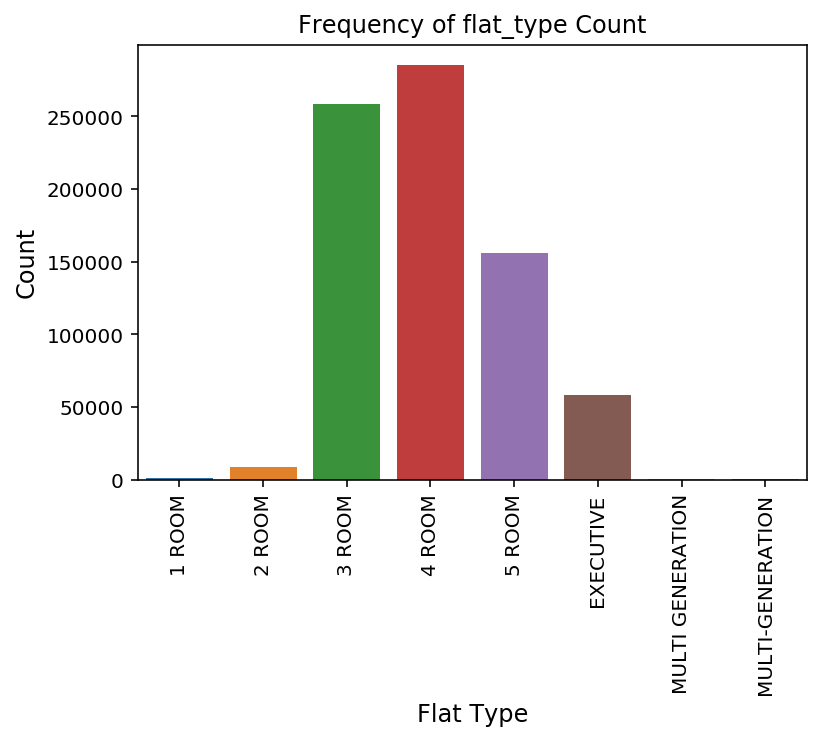

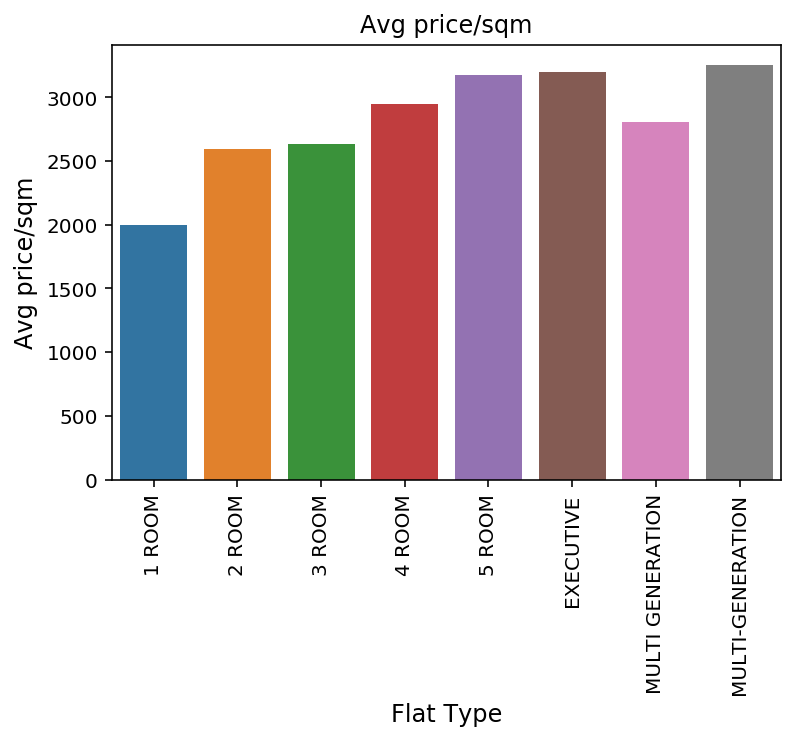

In [17]:
#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
#flat_type_count = data['flat_type'].value_counts()
#print("Flat Type Count \n" +str(flat_type_count))

flat_type = np.unique(data['flat_type'])

sns.countplot(x="flat_type", data=data , order = flat_type)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Flat Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_type Count", fontsize=12)
plt.show()

#flat type vs avg price/sqm
n = len(flat_type)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['flat_type'] == flat_type[i]].sum()
        sqmm = data['floor_area_sqm'][data['flat_type'] == flat_type[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(flat_type,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Flat Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- 1 Room, 2 Room, and Multi-Generations are clearly fewer than the remaining flat types.
- The most common flat type is 4 rooms.
- Prices per sqm, surprisingly, seem to up with flat size. <br>

#### Feature: Flat Model

Total Flat Model Count: 34


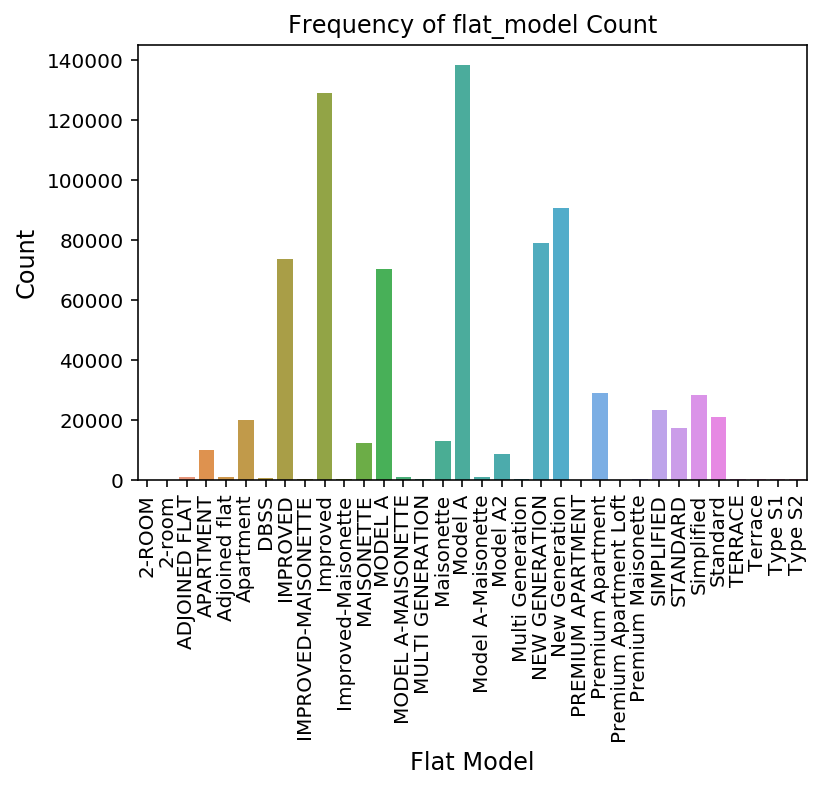

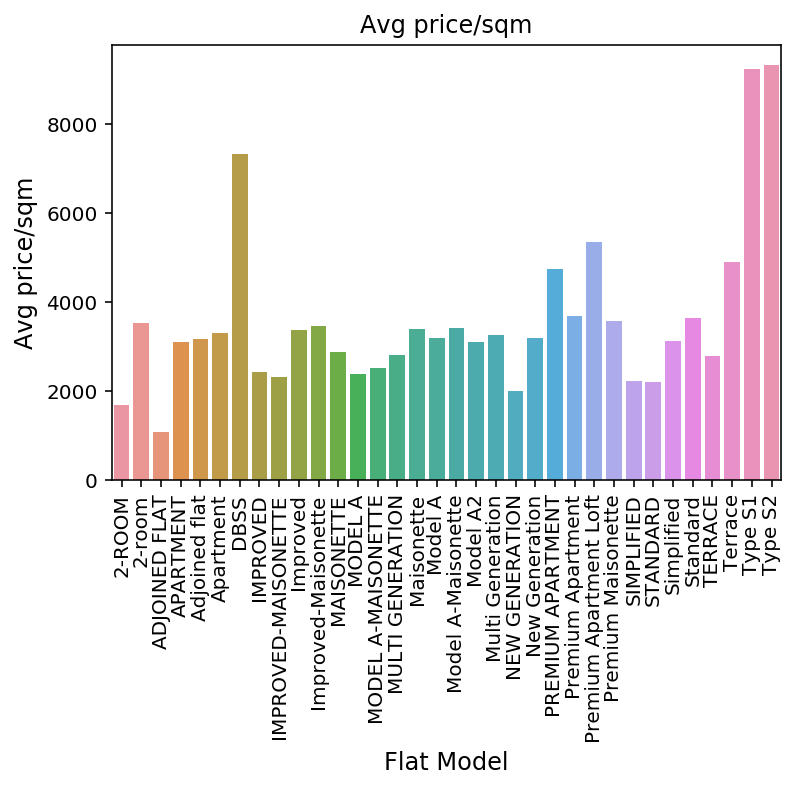

In [18]:
#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
#flat_model_count = data['flat_model'].value_counts()
#print("Flat Model Count \n" +str(flat_model_count))

flat_model = np.unique(data['flat_model'])

sns.countplot(x="flat_model", data=data , order = flat_model)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Flat Model', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_model Count", fontsize=12)
plt.show()

#flat model vs avg price/sqm
n = len(flat_model)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['flat_model'] == flat_model[i]].sum()
        sqmm = data['floor_area_sqm'][data['flat_model'] == flat_model[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(flat_model,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Flat Model', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Obersvations:
- Concerning flat_models, there are lot of flat_models that exist less than a 1000 times.
- The most common ones are 'Model A' and 'Improved'.
- Prices/sqm vary widely, which is probably due to some sample sizes being very small. <br>

#### Feature: Storey Range

Total Storey Range Count: 25


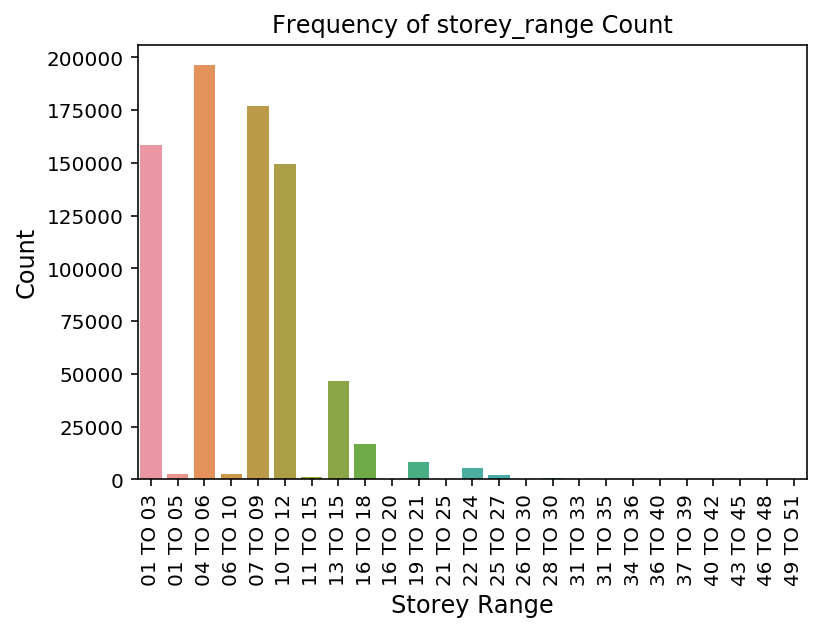

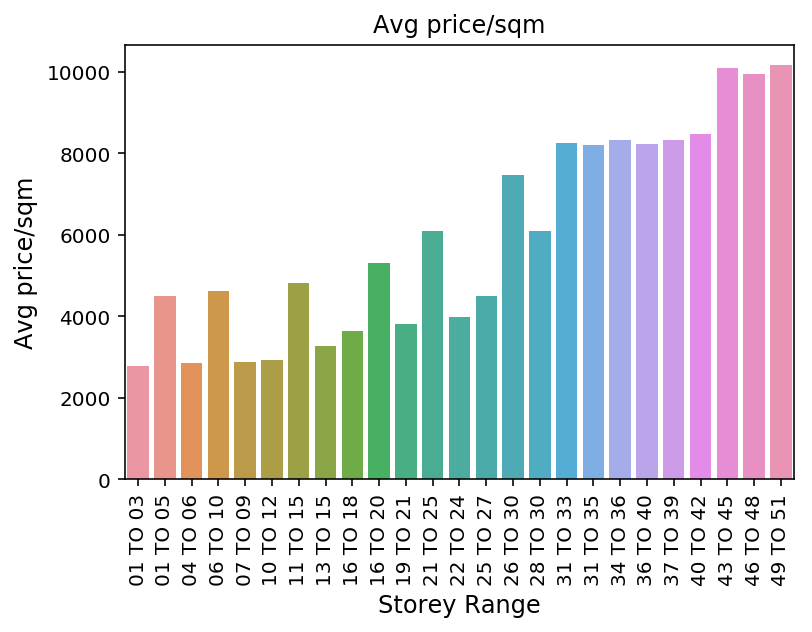

In [19]:
#storey range count
count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
#storey_range_count = data['storey_range'].value_counts()
#print("Storey Range Count \n" +str(storey_range_count))

storey_array = np.unique(data['storey_range'])

sns.countplot(x="storey_range", data=data , order = storey_array)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Storey Range', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of storey_range Count", fontsize=12)
plt.show()

#storey range vs avg price/sqm
n = len(storey_array)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['storey_range'] == storey_array[i]].sum()
        sqmm = data['floor_area_sqm'][data['storey_range'] == storey_array[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(storey_array,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Storey Range', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- There is a clear upwards trend in prices for higher stories.
- There are few storey ranges that spike in price.
- Those ranges also tend to have really low frequency.
- These ranges also tend to be included in other ranges.
- It is possible that e.g. in recent years, which have higher prices, the storey format changed; which would explain higher avg. prices per sqm. <br>

#### Feature: Squared Meters Distribution

Total SQM Range Count: 209


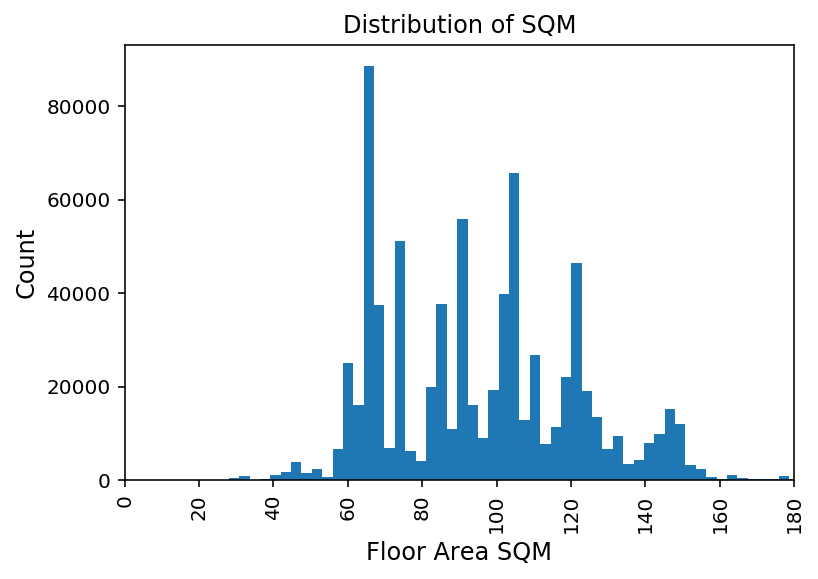

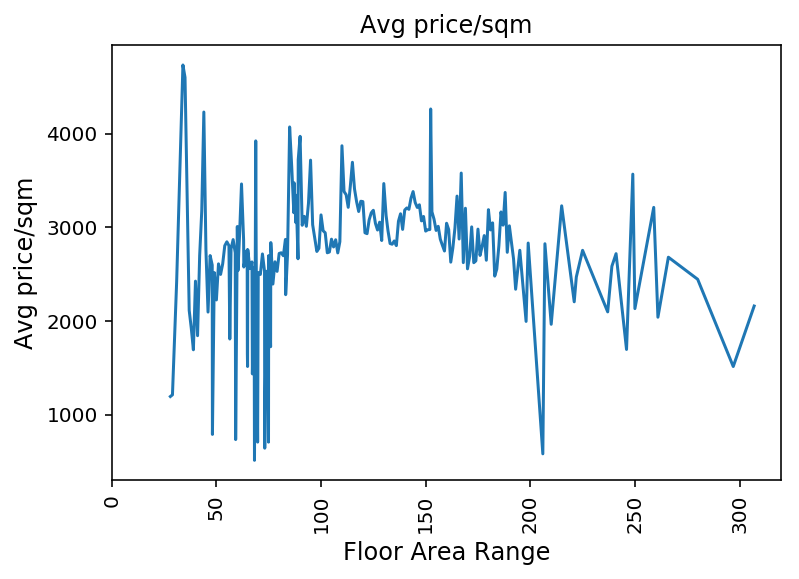

In [20]:
#SQM distribution
count_sqm = data['floor_area_sqm'].nunique()
print("Total SQM Range Count:", count_sqm)
#sqm_count = data['floor_area_sqm'].value_counts()
#print("SQM Range Count \n" +str(sqm_count))

sqm_area = np.unique(data['floor_area_sqm'])

plt.hist(data['floor_area_sqm'], bins = 100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Floor Area SQM', fontsize=12)
plt.xlim(0,180)
plt.xticks(rotation='vertical')
plt.title("Distribution of SQM", fontsize=12)
plt.show()

#storey range vs avg price/sqm
n = len(sqm_area)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['floor_area_sqm'] == sqm_area[i]].sum()
        sqmm = data['floor_area_sqm'][data['floor_area_sqm'] == sqm_area[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
plt.plot(sqm_area,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Floor Area Range', fontsize=12)
plt.xlim(0,320)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- We can see that the largest chunk of the HBDs are between 25 and 200 sqm.
- There are strong variations of counts between the different bins.
- Prices per sqm seem to be highest in the mid-range of SQM. <br>

#### Feature: Resale Price

Total Resale Price Range Count: 8082


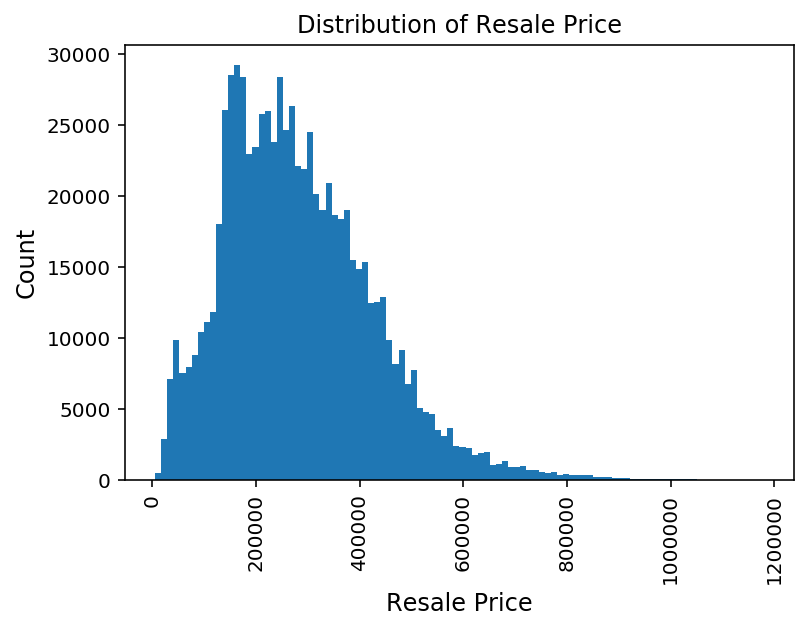

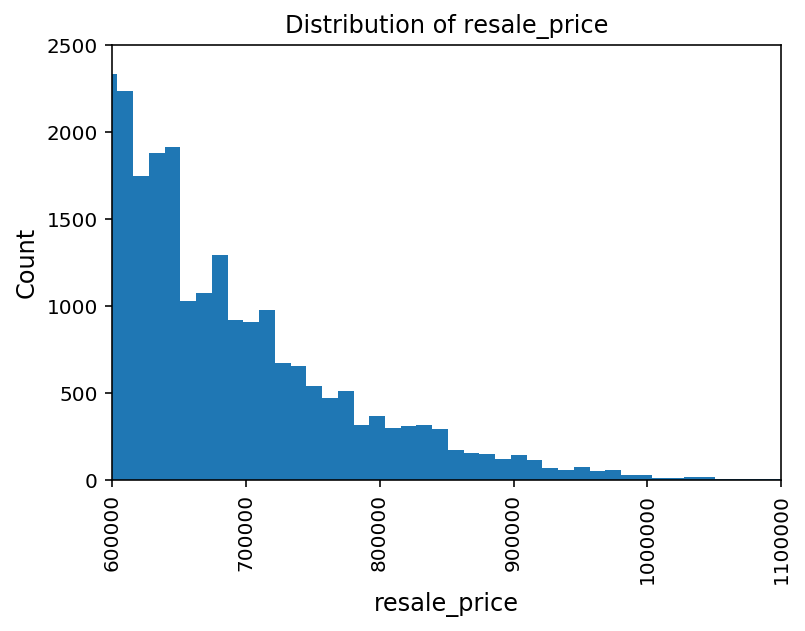

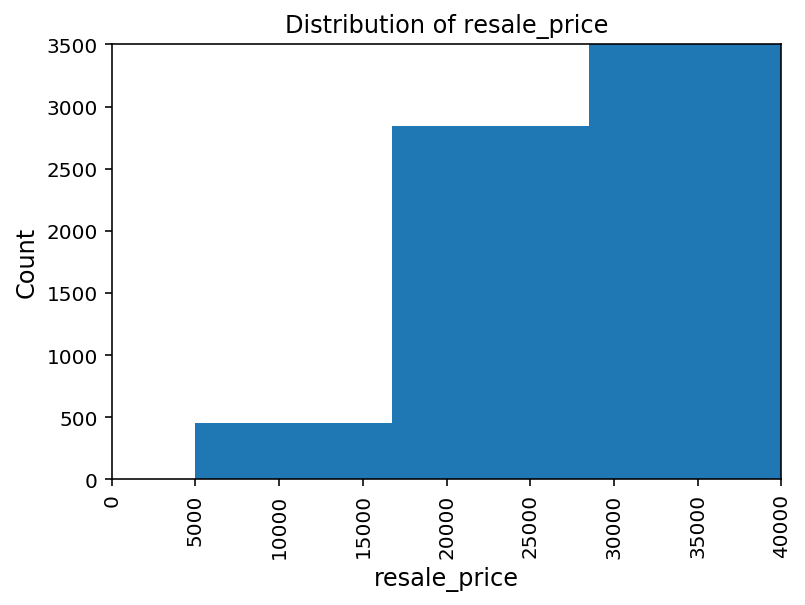

In [21]:
#resale price distribution
count_price = data['resale_price'].nunique()
print("Total Resale Price Range Count:", count_price)
#price_count = data['resale_price'].value_counts()
#print("Resale Price Range Count \n" +str(price_count))

plt.hist(data['resale_price'], bins = 100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Resale Price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribution of Resale Price", fontsize=12)
plt.show()

#resale prices above $1,000,000
plt.hist(data['resale_price'], bins=100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('resale_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0,2500)
plt.xlim(600000,1100000)
plt.title("Distribution of resale_price", fontsize=12)
plt.show()

#resale prices under $10,000
plt.hist(data['resale_price'], bins=100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('resale_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0,3500)
plt.xlim(0,40000)
plt.title("Distribution of resale_price", fontsize=12)
plt.show()

Observations:
- Practically no prices per flat go above 1,000,000 SGD.
- The majority of prices are between 150,000 and 400,000 SGD.
- There seems to be a number of flats (400+) that were sold for less than 10,000 SGD. <br>

## 3 Cleaning and Preprocessing the Dataset
<hr>
After exploring the dataset, we came across the following points for preprocessing the data: 
- The feature month consists of sales year and month, e.g. 1990-01. To include the variable in the model, this variable will be seperated to a variable called sales year and a variable called month. 
- However, a linear regression will not be able to read the years, since it can see it as another numerical value. Therefore, the remaining lease year is calculated. Once the sales year variable is created, the remaining lease year can be computed by using the following formula: $remaining lease year = 99 - (sales year - lease commence date)$.
- Furthermore, there are rows containing characters. These rows (town, flat type, flat model and storey range) are transformed into dummy variables to clarify their levels, with other words, to quantify the qualitative data. <br>

### 3.1 Data Cleaning
During the exploration, there are some cleaning that should be performed. First, the flat types consist of eight types, which should be seven types instead. The flat type "Multi Generation" has a unique value with a space in between and one with a hyphen. Second, the flat models consist of 32 models, which should be 21 instead. This is also because of the capital usage. These doubles are removed by cleaning the data.


In [22]:
pd.options.mode.chained_assignment = None #SettingWithCopyWarning for confusing chained assignment disabled

#remove doubles
data['flat_type'][data['flat_type'] == 'MULTI-GENERATION'] = 'MULTI GENERATION'

#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
flat_type_count = data['flat_type'].value_counts()
print("Flat Type \n" +str(flat_type_count))

Total Flat Type Count: 7
Flat Type 
4 ROOM              285136
3 ROOM              258482
5 ROOM              156260
EXECUTIVE            58177
2 ROOM                8859
1 ROOM                1246
MULTI GENERATION       469
Name: flat_type, dtype: int64


In [23]:
#remove doubles
data['flat_model'][data['flat_model'] == 'MODEL A'] = 'Model A'
data['flat_model'][data['flat_model'] == 'IMPROVED'] = 'Improved'
data['flat_model'][data['flat_model'] == 'NEW GENERATION'] = 'New Generation'
data['flat_model'][data['flat_model'] == 'PREMIUM APARTMENT'] = 'Premium Apartment'
data['flat_model'][data['flat_model'] == 'SIMPLIFIED'] = 'Simplified'
data['flat_model'][data['flat_model'] == 'STANDARD'] = 'Standard'
data['flat_model'][data['flat_model'] == 'APARTMENT'] = 'Apertment'
data['flat_model'][data['flat_model'] == 'MAISONETTE'] = 'Maisonette'
data['flat_model'][data['flat_model'] == 'ADJOINED FLAT'] = 'Adjoined flat'
data['flat_model'][data['flat_model'] == 'MODEL A-MAISONETTE'] = 'Model A-Maisonette'
data['flat_model'][data['flat_model'] == 'TERRACE'] = 'Terrace'
data['flat_model'][data['flat_model'] == 'MULTI GENERATION'] = 'Multi Generation'
data['flat_model'][data['flat_model'] == 'IMPROVED-MAISONETTE'] = 'Improved-Maisonette'
data['flat_model'][data['flat_model'] == '2-ROOM'] = '2-room'

#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

Total Flat Model Count: 21
Flat Model Count 
Model A                   208633
Improved                  202602
New Generation            169643
Simplified                 51604
Standard                   38234
Premium Apartment          28886
Maisonette                 25136
Apartment                  19745
Apertment                   9901
Model A2                    8382
Adjoined flat               1913
Model A-Maisonette          1784
Terrace                      609
DBSS                         601
Multi Generation             469
Type S1                      183
Improved-Maisonette          105
Type S2                       80
Premium Maisonette            75
2-room                        38
Premium Apartment Loft         6
Name: flat_model, dtype: int64


### 3.2 Feature Engineering
In this part, we will explore new features that we can add to make our data more valuable. Since the data consists of seven objects, two floats and one integer, the seven objects will be researched and to see which can and will be changed. (Note that adding and dropping variables have been changed to comments, because an error would pop up otherwise. This is because the variable is already added or dropped, thus it cannot be performed again.)

In [24]:
#add sales year variable
data.insert(1,'sales_year',(pd.DatetimeIndex(data['month']).year))

#add month2 variable
data.insert(1,'month2',(pd.DatetimeIndex(data['month']).month))

#remove month variable
data = data.drop('month',1)

#rename month2 variable
data = data.rename(columns = {'month2':'month'})

#compute remaining lease variable
data['remaining_lease'] = 99 - (data.sales_year - data.lease_commence_date)

In [25]:
data.tail(5)

,month,sales_year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
58626,1,2018,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,490000.0,68
58627,1,2018,YISHUN,5 ROOM,876,YISHUN ST 81,04 TO 06,121.0,Improved,1987,468000.0,68
58628,1,2018,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,146.0,Maisonette,1987,555000.0,68
58629,1,2018,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,550000.0,69
58630,1,2018,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,146.0,Maisonette,1985,545000.0,66


### 3.3 Create dummy variables
To use the string variables in the linear regression, dummies are made for the following features: town/area, flat type, flat model and storey range.

In [26]:
#add area variable
data.insert(1,'area',(data['town']))

In [27]:
#dummies for areas
data['area'][data.area == 'BUKIT MERAH'] = 1
data['area'][data.area == 'TOA PAYOH'] = 1
data['area'][data.area == 'QUEENSTOWN'] = 1
data['area'][data.area == 'GEYLANG'] = 1
data['area'][data.area == 'KALLANG/WHAMPOA'] = 1
data['area'][data.area == 'BISHAN'] = 1
data['area'][data.area == 'MARINE PARADE'] = 1
data['area'][data.area == 'CENTRAL AREA'] = 1
data['area'][data.area == 'BUKIT TIMAH'] = 1
data['area'][data.area == 'TAMPINES'] = 2
data['area'][data.area == 'YISHUN'] = 2
data['area'][data.area == 'BEDOK'] = 2
data['area'][data.area == 'PASIR RIS'] = 2
data['area'][data.area == 'JURONG WEST'] = 3
data['area'][data.area == 'BUKIT BATOK'] = 3
data['area'][data.area == 'CHOA CHU KANG'] = 3
data['area'][data.area == 'CLEMENTI'] = 3
data['area'][data.area == 'JURONG EAST'] = 3
data['area'][data.area == 'BUKIT PANJANG'] = 3
data['area'][data.area == 'WOODLANDS'] = 4
data['area'][data.area == 'SEMBAWANG'] = 4
data['area'][data.area == 'LIM CHU KANG'] = 4
data['area'][data.area == 'ANG MO KIO'] = 5
data['area'][data.area == 'HOUGANG'] = 5
data['area'][data.area == 'SERANGOON'] = 5
data['area'][data.area == 'SENGKANG'] = 5
data['area'][data.area == 'PUNGGOL'] = 5

area_count = data['area'].value_counts()
print("Area \n" +str(area_count))

#source: http://www.hdb.gov.sg/cs/infoweb/about-us/history/hdb-towns-your-home

Area 
2    215084
3    193490
1    160121
5    136074
4     63860
Name: area, dtype: int64


In [28]:
#dummies for flat types
data['flat_type'][data.flat_type == '1 ROOM'] = 1
data['flat_type'][data.flat_type == '2 ROOM'] = 2
data['flat_type'][data.flat_type == '3 ROOM'] = 3
data['flat_type'][data.flat_type == '4 ROOM'] = 4
data['flat_type'][data.flat_type == '5 ROOM'] = 5
data['flat_type'][data.flat_type == 'MULTI GENERATION'] = 6
data['flat_type'][data.flat_type == 'EXECUTIVE'] = 7

flat_type_count = data['flat_type'].value_counts()
print("Flat Type \n" +str(flat_type_count))

#source: http://www.hdb.gov.sg/cs/infoweb/residential/buying-a-flat/new/types-of-flats&rendermode=preview

Flat Type 
4    285136
3    258482
5    156260
7     58177
2      8859
1      1246
6       469
Name: flat_type, dtype: int64


In [29]:
#dummies for flat models


count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

Total Flat Model Count: 21
Flat Model Count 
Model A                   208633
Improved                  202602
New Generation            169643
Simplified                 51604
Standard                   38234
Premium Apartment          28886
Maisonette                 25136
Apartment                  19745
Apertment                   9901
Model A2                    8382
Adjoined flat               1913
Model A-Maisonette          1784
Terrace                      609
DBSS                         601
Multi Generation             469
Type S1                      183
Improved-Maisonette          105
Type S2                       80
Premium Maisonette            75
2-room                        38
Premium Apartment Loft         6
Name: flat_model, dtype: int64


In [30]:
#dummies for storey ranges


count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
storey_range_count = data['storey_range'].value_counts()
print("Storey Range Count \n" +str(storey_range_count))

Total Storey Range Count: 25
Storey Range Count 
04 TO 06    196169
07 TO 09    177012
01 TO 03    158446
10 TO 12    149470
13 TO 15     46780
16 TO 18     16906
19 TO 21      8337
22 TO 24      5233
01 TO 05      2700
06 TO 10      2474
25 TO 27      2100
11 TO 15      1259
28 TO 30       788
16 TO 20       265
31 TO 33       151
34 TO 36       151
37 TO 39       148
21 TO 25        92
40 TO 42        73
26 TO 30        39
46 TO 48        11
43 TO 45        11
36 TO 40         7
49 TO 51         5
31 TO 35         2
Name: storey_range, dtype: int64


In [31]:
data.tail(25)

,month,area,sales_year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
58606,1,2,2018,YISHUN,4,146,YISHUN ST 11,04 TO 06,93.0,New Generation,1985,358000.0,66
58607,1,2,2018,YISHUN,4,153,YISHUN ST 11,10 TO 12,93.0,New Generation,1986,415000.0,67
58608,1,2,2018,YISHUN,4,123,YISHUN ST 11,10 TO 12,93.0,New Generation,1985,360000.0,66
58609,1,2,2018,YISHUN,4,232,YISHUN ST 21,04 TO 06,98.0,New Generation,1985,330000.0,66
58610,1,2,2018,YISHUN,4,263,YISHUN ST 22,10 TO 12,104.0,Model A,1986,350000.0,67
58611,1,2,2018,YISHUN,4,629,YISHUN ST 61,10 TO 12,105.0,Model A,1988,460000.0,69
58612,1,2,2018,YISHUN,4,613,YISHUN ST 61,07 TO 09,85.0,Simplified,1987,336000.0,68
58613,1,2,2018,YISHUN,4,721,YISHUN ST 71,10 TO 12,104.0,Model A,1985,360000.0,66
58614,1,2,2018,YISHUN,4,713,YISHUN ST 71,04 TO 06,84.0,Simplified,1987,288000.0,68
58615,1,2,2018,YISHUN,4,738,YISHUN ST 72,01 TO 03,91.0,New Generation,1985,350000.0,66


To check whether the remaining lease variable is correct, the data tail from dataset 5 in the data acquisition is used to compare with the new data. Since only the fifth data set consists of this data, we could use the column for validation. 

### 3.4 Variables

The variables considered in the research will be: <br>
$x_1$ Remaining lease year <br>
$x_2$ Floor area squared meters <br>
$D_3$ Town and/or Area <br>
$D_4$ Flat type <br>
$D_5$ Flat model <br>
$D_6$ Storey range <br>
$x_7$ Month <br>
$Y$ Resale price <br>

In [32]:
#remove unnecessary variables
#data = data.drop('sales_year',1)
#data = data.drop('lease_commence_date',1)

## 4 Data Analysis
<hr>
This part of the report will show algorithms that have been applied to predict the housing prices. We have focused on regressions with different features. <br>

### 4.1 Linear Regression
Predictive model with linear regression

   month area  sales_year        town flat_type block       street_name  \
0      1    5        1990  ANG MO KIO         1   309  ANG MO KIO AVE 1   
1      1    5        1990  ANG MO KIO         1   309  ANG MO KIO AVE 1   
2      1    5        1990  ANG MO KIO         1   309  ANG MO KIO AVE 1   
3      1    5        1990  ANG MO KIO         1   309  ANG MO KIO AVE 1   
4      1    5        1990  ANG MO KIO         3   216  ANG MO KIO AVE 1   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     10 TO 12            31.0        Improved                 1977   
1     04 TO 06            31.0        Improved                 1977   
2     10 TO 12            31.0        Improved                 1977   
3     07 TO 09            31.0        Improved                 1977   
4     04 TO 06            73.0  New Generation                 1976   

   resale_price  remaining_lease  
0        9000.0               86  
1        6000.0               86  
2        8000.0  

In [122]:
## Prepare data
print(data.head())
data_reduced = data[['floor_area_sqm','sales_year','lease_commence_date','flat_type','area','resale_price']]
print(data_reduced.info())
data_red_matrix = data_reduced.as_matrix()
data_red_lim_matrix = data_red_matrix[:58630,:]
print(data_red_matrix.shape)
print(data_red_lim_matrix.shape)
#print(data_reduced.iloc[:,0:5])
#print(data_reduced.iloc[:,5])
data_input = data_red_matrix[:,0:5]
data_output = data_red_matrix[:,5]
#plt.scatter(data_input.iloc[:,0], data_output) PLOT IS OK
plt.show()

# Separating the data
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)
print('Our train data contains',x_train.shape[0],'entries.')
print('Our test data contains',x_test.shape[0],'entries.')

   month area  sales_year        town flat_type block       street_name  \
0      1    5        1990  ANG MO KIO         1   309  ANG MO KIO AVE 1   
1      1    5        1990  ANG MO KIO         1   309  ANG MO KIO AVE 1   
2      1    5        1990  ANG MO KIO         1   309  ANG MO KIO AVE 1   
3      1    5        1990  ANG MO KIO         1   309  ANG MO KIO AVE 1   
4      1    5        1990  ANG MO KIO         3   216  ANG MO KIO AVE 1   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     10 TO 12            31.0        Improved                 1977   
1     04 TO 06            31.0        Improved                 1977   
2     10 TO 12            31.0        Improved                 1977   
3     07 TO 09            31.0        Improved                 1977   
4     04 TO 06            73.0  New Generation                 1976   

   resale_price  remaining_lease  
0        9000.0               86  
1        6000.0               86  
2        8000.0  

In [41]:
## Prepare data
data_input = data[['floor_area_sqm','sales_year','lease_commence_date','flat_type','area','resale_price']]
data_output = data['resale_price']
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)
print('Our train data contains',x_train.shape[0],'entries.')
print('Our test data contains',x_test.shape[0],'entries.')


        floor_area_sqm  sales_year  lease_commence_date flat_type area  \
152179           110.0        2011                 2000         5    4   
249295            75.0        1999                 1985         3    3   
39600            145.0        2017                 1996         7    2   
130077            73.0        1996                 1989         3    3   
127638            67.0        2010                 1979         3    3   

        resale_price  
152179      435000.0  
249295      130500.0  
39600       685000.0  
130077      143000.0  
127638      318000.0  
Our train data contains 514981 entries.
Our test data contains 253648 entries.


In [43]:
# Run Forest Run
model_Forest = RandomForestRegressor()
model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
diff = y_pred_f-y_test
print(diff[:10])
print(y_pred_f)
print(y_test)
mse_f = mean_squared_error(y_test, y_pred_f)
mae_f = mean_absolute_error(y_test, y_pred_f)
#print("Mean Square Error for Random Forrest: %.2f" % mse_f)
print("Mean Absolute Error for Random Forrest: %.0f" % mae_f)


204064    0.0
53585     0.0
70326     0.0
168743    0.0
581       0.0
288033    0.0
50300     0.0
23640     0.0
29472     0.0
123072    0.0
Name: resale_price, dtype: float64
[161000.  515000.  325000.  ... 147000.  540826.4 360000. ]
204064    161000.0
53585     515000.0
70326     325000.0
168743    435000.0
581       352000.0
288033    265000.0
50300     255000.0
23640     330000.0
29472     310000.0
123072    192000.0
45496     400000.0
63019     170000.0
40946     244000.0
24494     350000.0
14751     380000.0
14209     350000.0
105001    341000.0
16852     601000.0
41072     315000.0
12162     303000.0
24093     135000.0
53552      68000.0
40856     192000.0
18279     182000.0
246316    315000.0
29527     325000.0
82720     213000.0
105149    165000.0
124732    300000.0
243621    162000.0
            ...   
62176     343000.0
57771     399999.0
32888     229000.0
122637    210000.0
6893      340000.0
45749     355000.0
228764    248000.0
21453     375000.0
96218     391000.0
37547

In [42]:
# Run Forest Run
model_Forest = RandomForestRegressor()
model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
diff = y_pred_f-y_test
print(diff[:10])
#print(y_pred_f)
#print(y_test)
mse_f = mean_squared_error(y_test, y_pred_f)
mae_f = mean_absolute_error(y_test, y_pred_f)
#print("Mean Square Error for Random Forrest: %.2f" % mse_f)
print("Mean Absolute Error for Random Forrest: %.0f" % mae_f)

# Run Linear Regression
model_lin_reg = LinearRegression()
model_lin_reg.fit(x_train, y_train)
y_pred_l = model_lin_reg.predict(x_test)
mse_l = mean_squared_error(y_test, y_pred_l)
mae_l = mean_absolute_error(y_test, y_pred_l)
#print("\n Mean Square Error for Linear Regression: ",mse_l)
print("\nMean Absolute Error for Linear Regression: %.0f" %mae_l)

# Run AdaBoost
model_abr = AdaBoostRegressor()
model_abr.fit(x_train, y_train)
y_pred_abr = model_abr.predict(x_test)
mse_abr = mean_squared_error(y_test, y_pred_abr)
mae_abr = mean_absolute_error(y_test, y_pred_abr)
#print("\n Mean Square Error for AdaBoost: ",mse_abr)
print("\nMean Absolute Error for AdaBoost: %.0f" %mae_abr)

# Run SGDRegressor
model_sgd = SGDRegressor()
#model_sgd.fit(x_train, y_train)
#y_pred_sgd = model_sgd.predict(x_test)
#mse_sgd = mean_squared_error(y_test, y_pred_sgd)
#mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
#print("\n Mean Square Error for SGDRegressor: ",mse_sgd)
#print("\nMean Absolute Error for SGDRegressor: %.0f" % mae_sgd)

# Run GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(x_train, y_train)
y_pred_gbr = model_gbr.predict(x_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
#print("\n Mean Square Error for GradientBoostingRegressor: ",mse_gbr)
print("\nMean Absolute Error for GradientBoostingRegressor: %.0f" %mae_gbr)

204064    0.0
53585     0.0
70326     0.0
168743    0.0
581       0.0
288033    0.0
50300     0.0
23640     0.0
29472     0.0
123072    0.0
Name: resale_price, dtype: float64
Mean Absolute Error for Random Forrest: 1

Mean Absolute Error for Linear Regression: 0

Mean Absolute Error for AdaBoost: 9619

Mean Absolute Error for GradientBoostingRegressor: 908


Observations:
- From the different prediction algorithms we used, Random Forrest performs the best. It's MAE is at 21k, compared to 55k and 69k for Linear Regression and Adaboost, respectively.
- Below we will tryout the Random Forrest algorithm which different selections of features.

In [44]:
data_reduced = data[['floor_area_sqm','sales_year','lease_commence_date','flat_type','area','resale_price']]

# sqm_year_lcd
sqm_year_lcd = data[['floor_area_sqm','sales_year','lease_commence_date','resale_price']]
sqm_year_lcd_matrix = sqm_year_lcd.as_matrix()
data_input = sqm_year_lcd_matrix[:,0:3]
data_output = sqm_year_lcd_matrix[:,3]
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
mae_f = mean_absolute_error(y_test, y_pred_f)
print("MAE with RF for SQM, sales year, lease date: %.0f" % mae_f)

# sqm_year_lcd_ft
sqm_year_lcd_ft = data[['floor_area_sqm','sales_year','lease_commence_date','flat_type','resale_price']]
sqm_year_lcd_ft_matrix = sqm_year_lcd_ft.as_matrix()
data_input = sqm_year_lcd_ft_matrix[:,0:4]
data_output = sqm_year_lcd_ft_matrix[:,4]
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
mae_f = mean_absolute_error(y_test, y_pred_f)
print("MAE with RF for SQM, sales year, lease date, flat type: %.0f" % mae_f)

# sqm_year_lcd_a
sqm_year_lcd_a = data[['floor_area_sqm','sales_year','lease_commence_date','area','resale_price']]
sqm_year_lcd_a_matrix = sqm_year_lcd_a.as_matrix()
data_input = sqm_year_lcd_a_matrix[:,0:4]
data_output = sqm_year_lcd_a_matrix[:,4]
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

model_Forest.fit(x_train, y_train)
y_pred_f = model_Forest.predict(x_test)
mae_f = mean_absolute_error(y_test, y_pred_f)
print("MAE with RF for SQM, sales year, lease date, area: %.0f" % mae_f)

MAE with RF for SQM, sales year, lease date: 29633
MAE with RF for SQM, sales year, lease date, flat type: 29463
MAE with RF for SQM, sales year, lease date, area: 21333


[1.  1.6 3.6 6.2 6.8 9.2]
[ 0  2  4  6  8 10]
Mean Square Error for Random Forrest:  0.5733333333333336


/Users/maximekayser/miniconda3/envs/kkbox/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### 4.2 Error Analysis 
To perform the error analysis, the accuracy are considered to 

### 4.3 Cross Validation
To check whether the data is overfitting 

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

## 5 Results
<hr>
Based on the analysis, the following results are derived:

## 6 Conclusion
<hr>
From this research, we can conclude